## 서포트 벡터 머신(Support Vector Machine)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 데이터 로드
df = pd.read_csv('./data/gym_churn_us.csv')

In [3]:
df.columns

Index(['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month',
       'Churn'],
      dtype='object')

In [11]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
# SVC(Support Vector Classification)

# SVM 모델
svm_model = SVC()

# 타겟 데이터 분리
X = df.drop('Churn', axis=1)
y = df['Churn']

# 훈련, 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- 선형 SVM

In [7]:
# 선형 SVM 모델 학습
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)


SVC(kernel='linear')

In [16]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc


# 예측 수행
y_pred = svm_linear.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"선형 SVM 정확도(Accuracy): {accuracy:.4f}")

# 정밀도 평가
precision = precision_score(y_test, y_pred)
print(f"선형 SVM 정밀도(Precision): {precision:.4f}")

# 재현율 평가
recall = recall_score(y_test, y_pred)
print(f"선형 SVM 재현율(Recall): {recall:.4f}")

# F1 Score (정밀도와 재현율의 조화 평균)
f1 = f1_score(y_test, y_pred)
print(f"선형 SVM F1-score: {f1:.4f}")

# AUC (ROC 커브 아래의 면적)
# 예측돤 거리는 decision function를 통해 반환
y_prob = svm_linear.decision_function(X_test)
# ROC 커브 계산
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
# AUC 계산
roc_auc = auc(fpr, tpr)
print(f'ROC-AUC: {roc_auc:.4f}')

선형 SVM 정확도(Accuracy): 0.9250
선형 SVM 정밀도(Precision): 0.9080
선형 SVM 재현율(Recall): 0.7822
선형 SVM F1-score: 0.8404
ROC-AUC: 0.9683


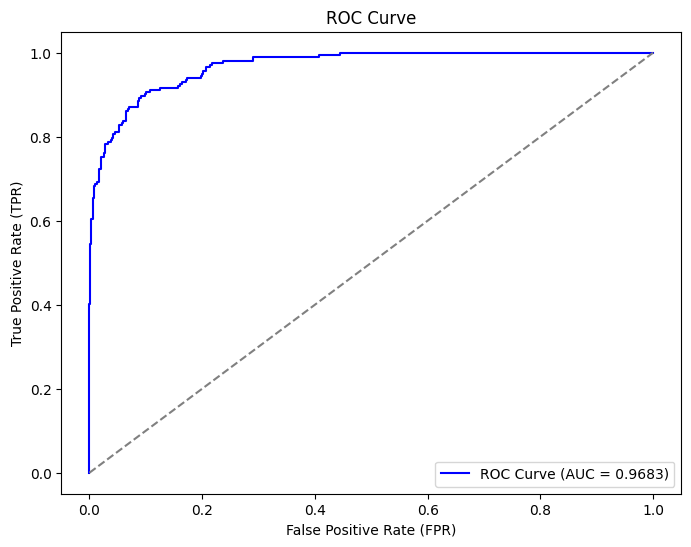

In [9]:
# 선형 SVM의의 ROC 커브 그리기
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # 대각선 기준선
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

- 하이퍼 파라미터 탐색

In [12]:
from sklearn.model_selection import GridSearchCV

# 탐색할 하이퍼 파라미터 설정 (grid)
param_grid = {
    'kernel': ['linear', 'rbf'],  # 사용 커널
    'C': [0.1, 1, 10, 100],  # 규제 강도
    'gamma': ['scale', 'auto']  # 결정 경계 영향 범위
}

# GridSearchCV 실행 (cv(교차 검증): 5-Fold)
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 최적의 하이퍼 파라미터 확인
print("최적의 하이퍼 파라미터:", grid_search.best_params_)
print("최고 검증 정확도:", grid_search.best_score_)

# 최적의 모델 적용
best_svm = grid_search.best_estimator_

최적의 하이퍼 파라미터: {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}
최고 검증 정확도: 0.9340624999999999


-> C가 100이 나왔으므로  10과 100사이 추가 탐색

In [13]:
# 탐색할 하이퍼 파라미터 설정 (grid)
param_grid = {
    'kernel': ['linear'],  # 사용 커널
    'C': [80, 90, 100, 110, 120],  # 규제 강도
    'gamma': ['scale']  # 결정 경계 영향 범위
}

# GridSearchCV 실행 (cv(교차 검증): 5-Fold)
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 최적의 하이퍼 파라미터 확인
print("최적의 하이퍼 파라미터:", grid_search.best_params_)
print("최고 검증 정확도:", grid_search.best_score_)

# 최적의 모델 적용
best_svm = grid_search.best_estimator_

최적의 하이퍼 파라미터: {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}
최고 검증 정확도: 0.9340624999999999


-> 기존에 탐색한 하이퍼 파라미터 값과 동일하게 나오는 것을 확인

In [15]:
# 예측 수행
y_pred = best_svm.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"선형 SVM 정확도(Accuracy): {accuracy:.4f}")

# 정밀도 평가
precision = precision_score(y_test, y_pred)
print(f"선형 SVM 정밀도(Precision): {precision:.4f}")

# 재현율 평가
recall = recall_score(y_test, y_pred)
print(f"선형 SVM 재현율(Recall): {recall:.4f}")

# F1 Score (정밀도와 재현율의 조화 평균)
f1 = f1_score(y_test, y_pred)
print(f"선형 SVM F1-score: {f1:.4f}")

# AUC (ROC 커브 아래의 면적)
# 예측돤 거리는 decision function를 통해 반환
y_prob = best_svm.decision_function(X_test)
# ROC 커브 계산
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
# AUC 계산
roc_auc = auc(fpr, tpr)
print(f'ROC-AUC: {roc_auc:.4f}')

선형 SVM 정확도(Accuracy): 0.9225
선형 SVM 정밀도(Precision): 0.8977
선형 SVM 재현율(Recall): 0.7822
선형 SVM F1-score: 0.8360
ROC-AUC: 0.9683


평가 지표|초기 점수|최적 하이퍼 파라미터 적용
|---|---|---|
선형 SVM 정확도(Accuracy)| 0.9250|0.9225
선형 SVM 정밀도(Precision)| 0.9080|0.8977
선형 SVM 재현율(Recall)| 0.7822|0.7822
선형 SVM F1-score| 0.8404|0.8360
ROC-AUC| 0.9683|0.9683